In [1]:
import pandas as pd
import numpy as np
import string
from scipy.stats import pearsonr
import re
from string import punctuation


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import re
from string import punctuation


from collections import Counter
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
sample_joy = pd.read_excel(r"C:\Users\kushal\Desktop\bennet dataset\Task 2 data\EI-oc-En-train\EI-oc-En-train-joy.xlsx")

In [3]:
sample_joy.head()

,ID,Tweet,Affect Dimension,Intensity Class
0,2017-En-30793,"@david_garrett Quite saddened.....no US dates,...",joy,0: no joy can be inferred
1,2017-En-30070,2 days until #GoPackGo and 23 days until #GoGi...,joy,3: high amount of joy can be inferred
2,2017-En-30692,Positive #psychology research shows salespeopl...,joy,0: no joy can be inferred
3,2017-En-31323,As the birds chirp and the cows moo we need to...,joy,1: low amount of joy can be inferred
4,2017-En-31553,Howling with laughter at â€œWELL DONE BEZZA!â€...,joy,3: high amount of joy can be inferred


In [4]:
sample_joy['Intensity_class'] = sample_joy['Intensity Class'].apply(lambda x : x.split(':')[0])
sample_joy['Intensity_class_name'] = sample_joy['Intensity Class'].apply(lambda x : x.split(':')[1])
sample_joy.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name
0,2017-En-30793,"@david_garrett Quite saddened.....no US dates,...",joy,0: no joy can be inferred,0,no joy can be inferred
1,2017-En-30070,2 days until #GoPackGo and 23 days until #GoGi...,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred
2,2017-En-30692,Positive #psychology research shows salespeopl...,joy,0: no joy can be inferred,0,no joy can be inferred
3,2017-En-31323,As the birds chirp and the cows moo we need to...,joy,1: low amount of joy can be inferred,1,low amount of joy can be inferred
4,2017-En-31553,Howling with laughter at â€œWELL DONE BEZZA!â€...,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred


In [5]:
sample_joy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 6 columns):
ID                      1616 non-null object
Tweet                   1616 non-null object
Affect Dimension        1616 non-null object
Intensity Class         1616 non-null object
Intensity_class         1616 non-null object
Intensity_class_name    1616 non-null object
dtypes: object(6)
memory usage: 75.8+ KB


In [6]:
# get unique Intensity Class  counts
sample_joy.groupby('Intensity_class_name').describe()

Affect Dimension                   \
                                                   count unique  top freq   
Intensity_class_name                                                        
 high amount of joy can be inferred                  359      1  joy  359   
 low amount of joy can be inferred                   363      1  joy  363   
 moderate amount of joy can be inferred              346      1  joy  346   
 no joy can be inferred                              548      1  joy  548   

                                           ID                             \
                                        count unique            top freq   
Intensity_class_name                                                       
 high amount of joy can be inferred       359    359  2017-En-31076    1   
 low amount of joy can be inferred        363    363  2017-En-30490    1   
 moderate amount of joy can be inferred   346    346  2017-En-30277    1   
 no joy can be inferred                   548    548  2017-En-30688    1   

                                        Intensity Class         \
                                                  count unique   
Intensity_class_name                                             
 high amount of joy can be inferred                 359      1   
 low amount of joy can be inferred                  363      1   
 moderate amount of joy can be inferred             346      1   
 no joy can be inferred                             548      1   

                                                                                    \
                                                                               top   
Intensity_class_name                                                                 
 high amount of joy can be inferred          3: high amount of joy can be inferred   
 low amount of joy can be inferred            1: low amount of joy can be inferred   
 moderate amount of joy can be inferred  2: moderate amount of joy can be inferred   
 no joy can be inferred                                  0: no joy can be inferred   

                                             Intensity_class                  \
                                        freq           count unique top freq   
Intensity_class_name                                                           
 high amount of joy can be inferred      359             359      1   3  359   
 low amount of joy can be inferred       363             363      1   1  363   
 moderate amount of joy can be inferred  346             346      1   2  346   
 no joy can be inferred                  548             548      1   0  548   

                                        Tweet         \
                                        count unique   
Intensity_class_name                                   
 high amount of joy can be inferred       359    359   
 low amount of joy can be inferred        363    363   
 moderate amount of joy can be inferred   346    346   
 no joy can be inferred                   548    548   

                                                                                            \
                                                                                       top   
Intensity_class_name                                                                         
 high amount of joy can be inferred      Omg. You've got to watch the new series 'This ...   
 low amount of joy can be inferred       @JoshuaLenon I trust you know that I appreciat...   
 moderate amount of joy can be inferred  @HytheHighborne -Sylvia was elated to receive ...   
 no joy can be inferred                  Seriously @marksandspencer I'm sick and grumpy...   

                                              
                                        freq  
Intensity_class_name                          
 high amount of joy can be inferred        1  
 low amount of joy can be inferred         1  
 moderate amount of joy can be inferred    1  
 no jo

In [7]:
sample_joy['length'] = sample_joy['Tweet'].apply(len)
sample_joy.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length
0,2017-En-30793,"@david_garrett Quite saddened.....no US dates,...",joy,0: no joy can be inferred,0,no joy can be inferred,137
1,2017-En-30070,2 days until #GoPackGo and 23 days until #GoGi...,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred,72
2,2017-En-30692,Positive #psychology research shows salespeopl...,joy,0: no joy can be inferred,0,no joy can be inferred,143
3,2017-En-31323,As the birds chirp and the cows moo we need to...,joy,1: low amount of joy can be inferred,1,low amount of joy can be inferred,104
4,2017-En-31553,Howling with laughter at â€œWELL DONE BEZZA!â€...,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred,62


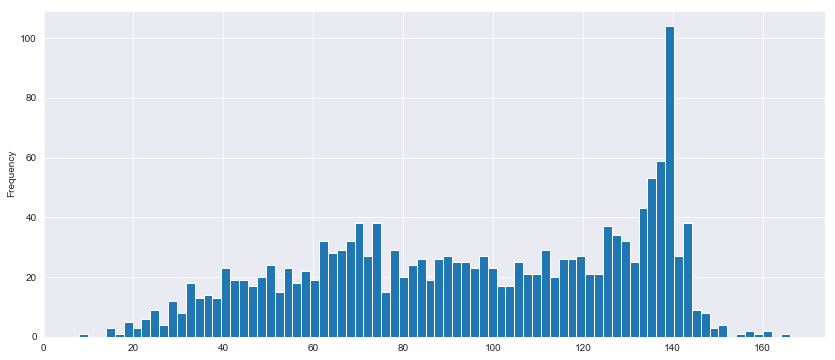

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sample_joy['length'].plot(bins=80, kind='hist') 

In [9]:
# get most common words in training dataset
all_words = []
for line in list(sample_joy['Tweet']):
    words = line.split()
    
for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('and', 3),
 ('in', 2),
 ('i', 1),
 ('think', 1),
 ('some', 1),
 ('of', 1),
 ('our', 1),
 ('most', 1),
 ('spiritually', 1),
 ('weighty', 1)]

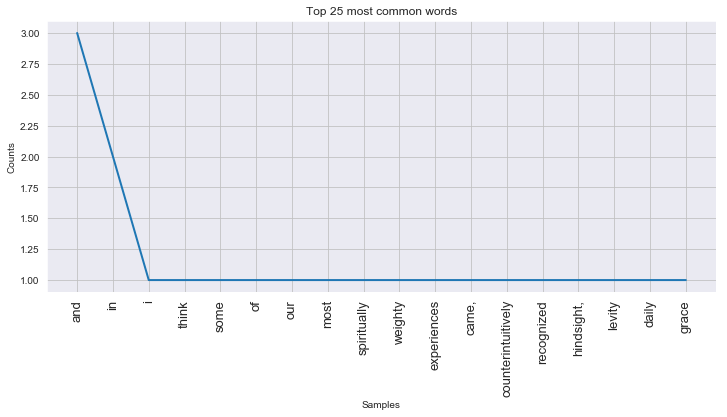

Text(0.5, 1.0, 'log-log plot of words frequency')

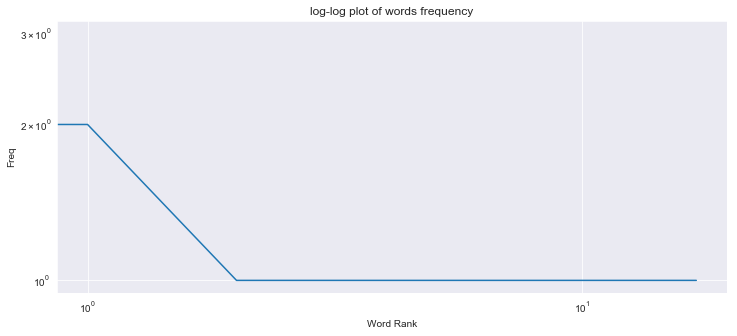

In [10]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [11]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove chines words
    tweet = re.sub(r'˜¥\w*','', tweet)
    tweet = re.sub(r'˜€\w*','', tweet)
    tweet = re.sub(r'˜¤\w*','', tweet)
    tweet = re.sub(r'˜ªðÿ\w*','', tweet)
    tweet = re.sub(r'ðÿ™\w*','', tweet)
    tweet = re.sub(r'\\\w*','', tweet)
    tweet = re.sub(r'±\w*','', tweet)
    tweet = re.sub(r'\w*','', tweet)
    tweet = re.sub(r'™„˜­\w*','', tweet)
    tweet = re.sub(r'ðÿ§€\w*','', tweet)
    tweet = re.sub(r'‘šðÿ¼\w*','', tweet)
    tweet = re.sub(r'ðÿ•\w*','', tweet)
    tweet = re.sub(r'€¢\w*','', tweet)
    tweet = re.sub(r'ã©\w*','', tweet)
    
    tweet = re.sub(r'\w*','',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
sample_joy['Tweet'] = sample_joy['Tweet'].apply(processTweet)
# preview some cleaned tweets
sample_joy['Tweet'].head(1000)

0      quite saddened dates joyous anticipation atten...
1                     days until and days until excited 
2      positive research shows salespeople who score ...
3      the birds chirp and the cows moo need listen t...
4             howling with laughter €œwell done bezza € 
5                                      afternoon delight
6      defo hearty root veg gratin nice comfort food ...
7      remember and reflect reginald denny night much...
8                                       that the spirit 
9                                                  also 
10     thank you for that the notification came the n...
11     they ain going away and don want see them hurt...
12     when havent learned swim ¤” but you keep worki...
13                     evening all don forget tonight  
14     close the end revision taking this story love ...
15         mirana told shut when was singing along glee 
16                                       open mind kind 
17     ”¥’ its lit having cla

In [12]:
# drop duplicates
sample_joy= sample_joy.drop_duplicates('Tweet')
sample_joy.shape

(1327, 7)

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [15]:
sample_joy["Tweet"].head(10)

0    quite saddened dates joyous anticipation atten...
1                   days until and days until excited 
2    positive research shows salespeople who score ...
3    the birds chirp and the cows moo need listen t...
4           howling with laughter €œwell done bezza € 
5                                    afternoon delight
6    defo hearty root veg gratin nice comfort food ...
7    remember and reflect reginald denny night much...
8                                     that the spirit 
9                                                also 
Name: Tweet, dtype: object

In [16]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]




# -------------------------------------------

# tokenize message column and create a column for tokens
sample_joy = sample_joy.copy()
sample_joy['tokens'] = sample_joy['Tweet'].apply(text_process) # tokenize style


sample_joy.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length,tokens
0,2017-En-30793,quite saddened dates joyous anticipation atten...,joy,0: no joy can be inferred,0,no joy can be inferred,137,"[quite, saddened, dates, joyous, anticipation,..."
1,2017-En-30070,days until and days until excited,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred,72,"[days, days, excited]"
2,2017-En-30692,positive research shows salespeople who score ...,joy,0: no joy can be inferred,0,no joy can be inferred,143,"[positive, research, shows, salespeople, score..."
3,2017-En-31323,the birds chirp and the cows moo need listen t...,joy,1: low amount of joy can be inferred,1,low amount of joy can be inferred,104,"[birds, chirp, cows, moo, need, listen, sound,..."
4,2017-En-31553,howling with laughter €œwell done bezza €,joy,3: high amount of joy can be inferred,3,high amount of joy can be inferred,62,"[howling, laughter, €œwell, done, bezza, €]"


In [17]:
from wordcloud import WordCloud

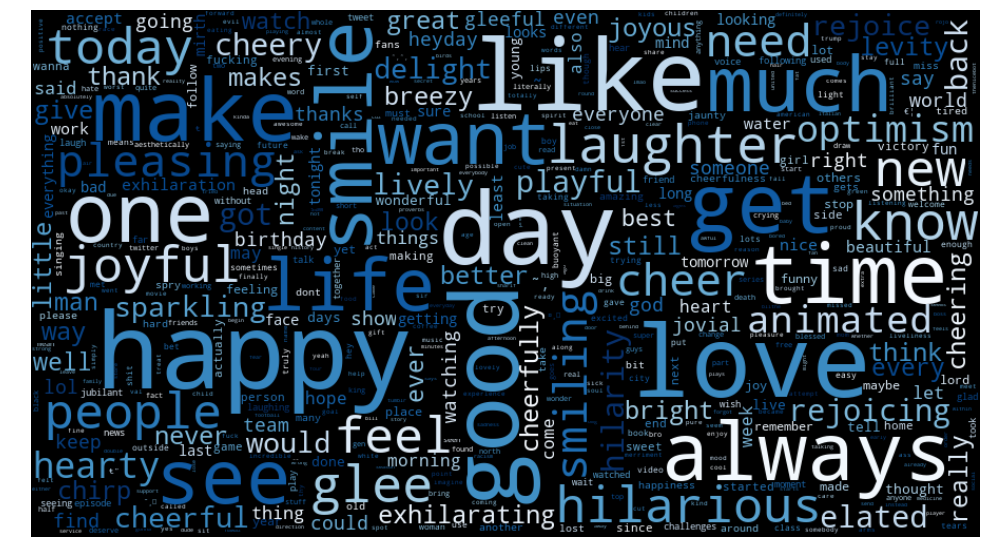

In [18]:
# split sentences to get individual words
all_words = []
for line in sample_joy['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(sample_joy['Tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# output
6865
# example of vectorized text
sample_tweet = sample_joy['Tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')



4115
may man live well and long enough leave many joyful widows behind him 


  (0, 344)	1
  (0, 1107)	1
  (0, 1863)	1
  (0, 1978)	1
  (0, 2038)	1
  (0, 2061)	1
  (0, 2131)	1
  (0, 2140)	1
  (0, 2162)	1
  (0, 3825)	1
  (0, 3851)	1




In [21]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(sample_joy['Tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


Shape of Sparse Matrix:  (1327, 4115)
Amount of Non-Zero occurences:  9926


In [22]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)


  (0, 3851)	0.38422442273812424
  (0, 3825)	0.2590745069195489
  (0, 2162)	0.2776703867546426
  (0, 2140)	0.3017541528135626
  (0, 2131)	0.26373605182673765
  (0, 2061)	0.28451275694368083
  (0, 2038)	0.28831017243878126
  (0, 1978)	0.33727216480805644
  (0, 1863)	0.24057558389629013
  (0, 1107)	0.3131883987491365
  (0, 344)	0.33727216480805644


In [23]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)



(1327, 4115)


In [24]:
# Run Train Data Through Pipeline analyzer=text_process
# uncomment below to train on a larger dataset but it is very slow for a regular laptop

# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(sample_joy['Tweet'], sample_joy['Intensity_class'], test_size=0.3, random_state = 42)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.400862 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.392241 Stdev:(0.025818) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.399784 Stdev:(0.030274) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.379310 Stdev:(0.024596) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.387931 Stdev:(0.028334) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.392241 Stdev:(0.021065) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.400862 Stdev:(0.027247) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.387931 Stdev:(0.025488) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.392241 Stdev:(0.027117) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.9s finished
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [25]:
from sklearn.externals import joblib

In [26]:
# save best model to current working directory
joblib.dump(grid, "twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [27]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.42355889724310775


confusion matrix: 
 [[94 17 13 15]
 [31 15 23 12]
 [26 16 16 29]
 [17  8 23 44]]


              precision    recall  f1-score   support

           0       0.56      0.68      0.61       139
           1       0.27      0.19      0.22        81
           2       0.21      0.18      0.20        87
           3       0.44      0.48      0.46        92

   micro avg       0.42      0.42      0.42       399
   macro avg       0.37      0.38      0.37       399
weighted avg       0.40      0.42      0.41       399

